# Single call statistics

Set the `roomId` to the room from which statistics is wanted and run the notebook.

In [1]:
!pip install pymongo
!pip install pandas

import pandas as pd
import matplotlib.pyplot as plt



Samples in call:  590
Earliest sample:  2022-11-15 14:36:58.032000
Latest sample:    2022-11-15 14:38:18.675000
Call duration:    0 days 00:01:20.643000
Samples from client  0fdfe5fd-1c4a-4fb6-843a-dbaa10b9a048 :  285
Average roundTripTime:  count    16.000000
mean      0.491063
std       0.173868
min       0.268000
25%       0.391000
50%       0.451500
75%       0.535500
max       1.026000
Name: roundTripTime, dtype: float64
Average jitter:  count    16.000000
mean      0.026063
std       0.002768
min       0.023000
25%       0.024000
50%       0.025500
75%       0.027250
max       0.034000
Name: jitter, dtype: float64


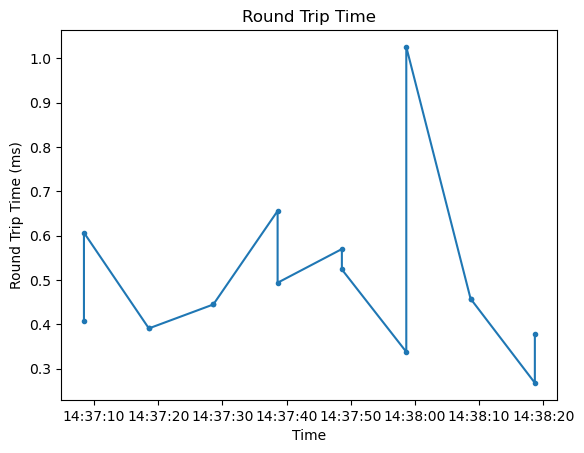

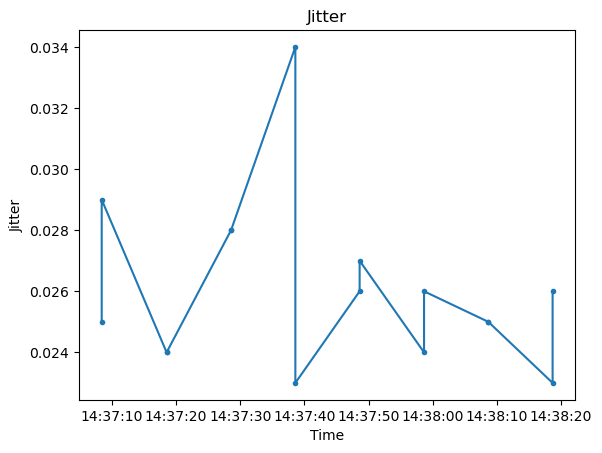

Samples from client  90b1ce14-6d92-467e-9d7d-e069f30ff684 :  305
Average roundTripTime:  count    16.000000
mean      0.574875
std       0.249454
min       0.184000
25%       0.397250
50%       0.524500
75%       0.685250
max       1.134000
Name: roundTripTime, dtype: float64
Average jitter:  count    16.000000
mean      0.027938
std       0.003435
min       0.021000
25%       0.026000
50%       0.028500
75%       0.030250
max       0.034000
Name: jitter, dtype: float64


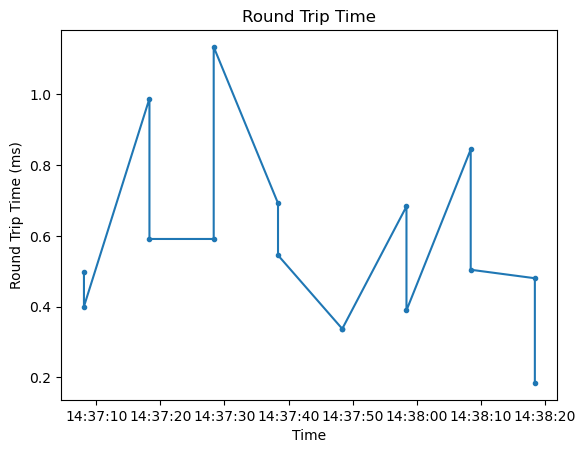

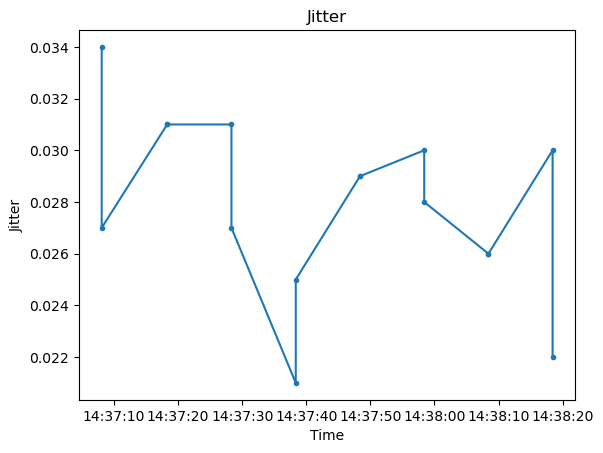

In [2]:
roomId = "room2_noproxy"
roomId = "room8"
roomId = "room3"


# read data into a DataFrame from rawData.csv
df = pd.read_csv('rawData.csv')

# drop rows where roomId is not 1234567890

df = df[df.roomId == roomId]

# extract the datetime from the timestamp
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# print the first 5 rows
# print(df.head(5))


# print the count of rows in the dataframe
print("Samples in call: ", len(df))
#find the earliest and latest date
print("Earliest sample: ", df['datetime'].min().strftime('%Y-%m-%d %H:%M:%S.%f'))
print("Latest sample:   ", df['datetime'].max().strftime('%Y-%m-%d %H:%M:%S.%f'))

# find the duration of the call
print("Call duration:   ", df['datetime'].max() - df['datetime'].min())


for(clientId) in df['clientId'].unique():
  print("Samples from client ", clientId, ": ", len(df[df.clientId == clientId]))

  # crate a new data frame for each client
  clientDf = df[df.clientId == clientId]

  # sort the data frame by datetime
  clientDf = clientDf.sort_values(by=['datetime'])

  # print the first 5 rows
  # print(clientDf.head(5))

  # find the rows where the type is remoteInBound and kind is video
  remoteInBoundVideoDf = clientDf[(clientDf.type == 'remote-inbound-rtp') & (clientDf.kind == 'video')]

  # print the first 5 rows
  # print(remoteInBoundVideoDf.head(5))

  #in the remoteInBoundVideoDf find the mean of the roundTripTime
  print("Average roundTripTime: ", remoteInBoundVideoDf['roundTripTime'].describe())
  
  #in the remoteInBoundVideoDf find the mean of the jitter
  print("Average jitter: ", remoteInBoundVideoDf["jitter"].describe())

  # plot a time series of the roundTripTime with bullets

  plt.plot(remoteInBoundVideoDf['datetime'], remoteInBoundVideoDf['roundTripTime'], '.-')
  plt.title('Round Trip Time')
  plt.xlabel('Time')
  plt.ylabel('Round Trip Time (ms)')
  plt.show()

  plt.plot(remoteInBoundVideoDf['datetime'], remoteInBoundVideoDf['jitter'], '.-')
  plt.title('Jitter')
  plt.xlabel('Time')
  plt.ylabel('Jitter')
  plt.show()
